[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
38/38 [==============================] - 1s 3ms/step - loss: 0.0177
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 6.2242e-04
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 2.2601e-04
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 2.1240e-04
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 2.1711e-04
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 1.8656e-04
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 1.8259e-04
Epoch 8/50
38/38 [==============================] - 0s 3ms/step - loss: 1.7654e-04
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 1.8300e-04
Epoch 10/50
38/38 [==============================] - 0s 3ms/step - loss: 1.7039e-04
Epoch 11/50
38/38 [==============================] - 0s 3ms/step - loss: 1.7582e-04
Epoch 12/50
38/38 [=

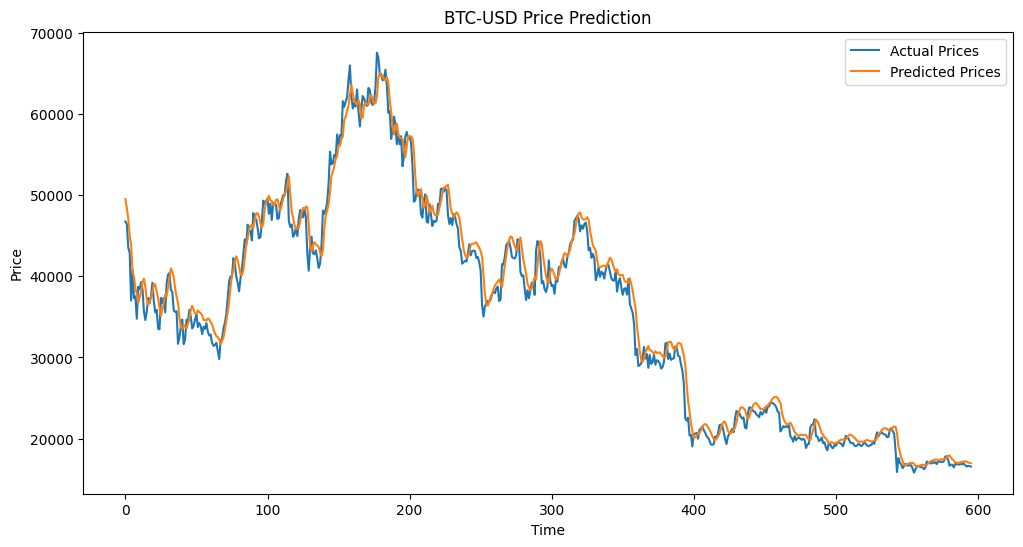

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download historical data from Yahoo Finance
data = yf.download('BTC-USD', start='2010-01-01', end='2023-01-01')

# Extract the 'Close' prices
df = data[['Close']].copy()

# Normalize the data
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Define a function to create input sequences for the LSTM model
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Define the sequence length and split the data into training and testing sets
sequence_length = 10
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('BTC-USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
